<a href="https://colab.research.google.com/github/Tekleab15/N-gram-Language-Models/blob/main/N_gram_language_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Amharic Text Processing and N-gram model Generation in Google Colab**

In [2]:
from google.colab import drive
import tensorflow as tf
from collections import defaultdict
import re, csv
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Amharic_Corpus/Copy_of_GPAC.txt'

# Text cleaning
def clean_text(text):
    return re.sub(r'[^ሀ-ፐ0-9\s\-\.,!?]', '', text)
def create_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

Mounted at /content/drive


*1.1 Create n-grams for n=1, 2, 3, 4. You can show sample prints*

In [3]:
# Initialize defaultdict for n-grams and their frequencies
unigram_freq = defaultdict(int)
bigram_freq = defaultdict(int)
trigram_freq = defaultdict(int)
fourgram_freq = defaultdict(int)

# Generator function to read and clean lines from the file
def read_and_clean_lines(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            cleaned_line = clean_text(line)
            tokens = cleaned_line.split()
            if tokens:
                yield tokens

# Initialize defaultdict for n-grams and their frequencies
unigram_freq = defaultdict(int)
bigram_freq = defaultdict(int)
trigram_freq = defaultdict(int)
fourgram_freq = defaultdict(int)

# Process the file using the generator function
for tokens in read_and_clean_lines(file_path):
    for ngram in create_ngrams(tokens, 1):
        unigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 2):
        bigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 3):
        trigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 4):
        fourgram_freq[ngram] += 1

# Print sample n-grams with their frequencies
print("         The first 10 n-gram representation: ")
print("Unigram: ", list(unigram_freq.items())[:10])
print("Bigram: ", list(bigram_freq.items())[:10])
print("Trigram: ", list(trigram_freq.items())[:10])
print("Fourgram: ", list(fourgram_freq.items())[:10])
print("\n\n\n")

         The first 10 n-gram representation: 
Unigram:  [('ምን', 43593), ('መሰላችሁ?', 942), ('አንባቢያን', 379), ('ኢትዮጵያ', 28031), ('በተደጋጋሚ', 4223), ('ጥሪው', 127), ('ደርሷት', 10), ('ልትታደመው', 1), ('ያልቻለችው', 24), ('የአለም', 1273)]
Bigram:  [('ምን መሰላችሁ?', 328), ('መሰላችሁ? አንባቢያን', 1), ('አንባቢያን ኢትዮጵያ', 1), ('ኢትዮጵያ በተደጋጋሚ', 9), ('በተደጋጋሚ ጥሪው', 1), ('ጥሪው ደርሷት', 1), ('ደርሷት ልትታደመው', 1), ('ልትታደመው ያልቻለችው', 1), ('ያልቻለችው የአለም', 1), ('የአለም የእግር', 5)]
Trigram:  [('ምን መሰላችሁ? አንባቢያን', 1), ('መሰላችሁ? አንባቢያን ኢትዮጵያ', 1), ('አንባቢያን ኢትዮጵያ በተደጋጋሚ', 1), ('ኢትዮጵያ በተደጋጋሚ ጥሪው', 1), ('በተደጋጋሚ ጥሪው ደርሷት', 1), ('ጥሪው ደርሷት ልትታደመው', 1), ('ደርሷት ልትታደመው ያልቻለችው', 1), ('ልትታደመው ያልቻለችው የአለም', 1), ('ያልቻለችው የአለም የእግር', 1), ('የአለም የእግር ኳስ', 5)]
Fourgram:  [('ምን መሰላችሁ? አንባቢያን ኢትዮጵያ', 1), ('መሰላችሁ? አንባቢያን ኢትዮጵያ በተደጋጋሚ', 1), ('አንባቢያን ኢትዮጵያ በተደጋጋሚ ጥሪው', 1), ('ኢትዮጵያ በተደጋጋሚ ጥሪው ደርሷት', 1), ('በተደጋጋሚ ጥሪው ደርሷት ልትታደመው', 1), ('ጥሪው ደርሷት ልትታደመው ያልቻለችው', 1), ('ደርሷት ልትታደመው ያልቻለችው የአለም', 1), ('ልትታደመው ያልቻለችው የአለም የእግር', 1), ('ያልቻለችው የአለም የእግር ኳስ', 1), ('የአለም የእግር ኳስ

*1.2 Calculate probabilities of n-grams and find the top 10 most likely n-grams for all n.*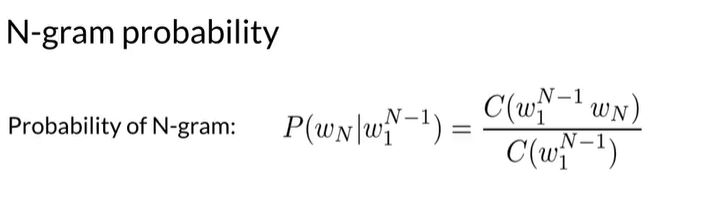

In [4]:
#Calculating total count of each counts
unigram_count = sum(unigram_freq.values())
bigram_count = sum(bigram_freq.values())
trigram_count = sum(trigram_freq.values())
fourgram_count = sum(fourgram_freq.values())

# Calculating probablities for each grams
def unigramProbablity(unigram):
  return unigram_freq[unigram] / unigram_count

def bigramProbablity(bigram):
  first_word = bigram.split()[0]
  return bigram_freq[bigram] / unigram_freq[first_word]

def trigramProbablity(trigram):
  first_two_words = " ".join(trigram.split()[:2])
  return trigram_freq[trigram] / bigram_freq[first_two_words]
def fourgramProbablity(fourgram):
  first_three_words = " ".join(fourgram.split()[:3])
  return fourgram_freq[fourgram] / trigram_freq[first_three_words]

# Calculate the probabilities of each grams(top ten)
top_ten_unigram = sorted(unigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_ten_bigram = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_ten_trigram = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_ten_fourgram = sorted(fourgram_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 most likely n-grams for all ngram
print("Top 10 Unigrams: ", top_ten_unigram)
print("Top 10 Bigrams: ", top_ten_bigram)
print("Top 10 Trigrams: ", top_ten_trigram)
print("Top 10 Fourgrams: ", top_ten_fourgram)

# Calculating the probability of the top n-grams
top_ten_unigram_prob = [(unigram, round(unigramProbablity(unigram),2)) for unigram, freq in top_ten_unigram]
top_ten_bigram_prob = [(bigram, round(bigramProbablity(bigram),2)) for bigram, freq in top_ten_bigram]
top_ten_trigram_prob = [(trigram, round(trigramProbablity(trigram),2)) for trigram, freq in top_ten_trigram]
top_ten_fourgram_prob = [(fourgram, round(fourgramProbablity(fourgram),2)) for fourgram, freq in top_ten_fourgram]
print("Top 10 Unigrams Probability: ", top_ten_unigram_prob)
print("Top 10 Bigrams Probability: ", top_ten_bigram_prob)
print("Top 10 Trigrams Probability: ", top_ten_trigram_prob)

Top 10 Unigrams:  [('ነው', 324514), ('ላይ', 205491), ('ውስጥ', 104513), ('ወደ', 88689), ('ግን', 86765), ('ጋር', 75879), ('ነበር', 73773), ('እና', 66925), ('ነገር', 64174), ('ጊዜ', 63284)]
Top 10 Bigrams:  [('ዓ ም', 32697), ('ነገር ግን', 14568), ('ብቻ ሳይሆን', 9897), ('ኤ አ', 8628), ('ማለት ነው', 8395), ('እ ኤ', 8285), ('ብቻ ነው', 7077), ('አዲስ አበባ', 6976), ('ምክር ቤት', 6907), ('በአዲስ አበባ', 6535)]
Top 10 Trigrams:  [('እ ኤ አ', 8227), ('2010 ዓ ም', 3547), ('2011 ዓ ም', 3037), ('ቀን 2010 ዓ', 3029), ('ቀን 2011 ዓ', 2701), ('ዓ ም ጀምሮ', 2125), ('2007 ዓ ም', 2110), ('2008 ዓ ም', 2040), ('2012 ዓ ም', 1921), ('ነው ነገር ግን', 1884)]
Top 10 Fourgrams:  [('ቀን 2010 ዓ ም', 3028), ('ቀን 2011 ዓ ም', 2700), ('ቀን 2008 ዓ ም', 1754), ('ቀን 2007 ዓ ም', 1715), ('ቀን 2012 ዓ ም', 1706), ('ሚኒስትር ዓብይ አህመድ ዶር', 1075), ('አመለካከት ብቻ የሚያንፀባርቅ መሆኑን', 944), ('የጸሐፊውን አመለካከት ብቻ የሚያንፀባርቅ', 923), ('ጽሑፉ የጸሐፊውን አመለካከት ብቻ', 919), ('የአዲስ አበባ ከተማ አስተዳደር', 777)]
Top 10 Unigrams Probability:  [('ነው', 0.02), ('ላይ', 0.01), ('ውስጥ', 0.0), ('ወደ', 0.0), ('ግን', 0.0), ('ጋር', 0.0), ('ነበር'

1.3 Calculate the conditional probability of a word given the previous word using
bigrams.
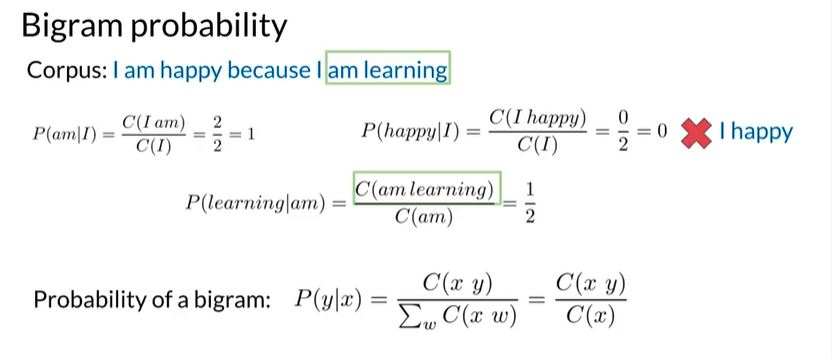

In [7]:
# Function to calculate the conditional probability of a word given the previous word using bigrams
def conditional_prob(bigram):
    first_word = bigram.split()[0]
    return bigram_freq[bigram] / unigram_freq[first_word]
# Calculate the conditional probability for a specific bigram
example_bigram = "አለም አቀፍ"
if example_bigram in bigram_freq:
    example_prob = round(conditional_prob(example_bigram), 2)
    print(f"Conditional probability of '{example_bigram}': {example_prob}")
else:
    print(f"Bigram '{example_bigram}' not found in the dataset.")

# Calculate and print the conditional probabilities for the top 10 bigrams
print("\nTop 10 Bigrams with Conditional Probabilities:")
for bigram, freq in top_ten_bigram:
    print(f"{bigram}: {round(conditional_prob(bigram), 2)}")


Conditional probability of 'አለም አቀፍ': 0.15

Top 10 Bigrams with Conditional Probabilities:
ዓ ም: 0.99
ነገር ግን: 0.23
ብቻ ሳይሆን: 0.19
ኤ አ: 0.92
ማለት ነው: 0.27
እ ኤ: 0.92
ብቻ ነው: 0.13
አዲስ አበባ: 0.31
ምክር ቤት: 0.58
በአዲስ አበባ: 0.71


1.4 Remove common stopwords and recompute bigram and trigram frequencies, find
the top 10 n-grams; n=1,2,3,4.(OPTIONAL) # FIND THE MOST COMMON AMHARIC
STOPWORDS BY YOURSELF

In [ ]:
amharic_stopwords = [
    'ለማለት', 'እነዚህ', 'ለምን', 'እንደሚሰራ', 'እንደገና', 'እንዲያ', 'ነበልባል', 'በስተ', 'እንዲ', 'ም', 'እስኪ', 'ስለ', 'በርቀት', 'አላቸው', 'እንዲህ', 'የ', 'እንደዚያ', 'ውስጥ', 'በታች', 'ኋላ', 'እንደ', 'ነበር', 'ከዚህ', 'ሶስት', 'አለ',
    'እንዲሆኑ', 'ከእነነዚህ', 'ማንኛውን', 'ያ', 'ሁሉ', 'ቀደም', 'እንደሚል', 'እሱ', 'እነሆ', 'እናንተ', 'በኩል', 'እንደሆኑ','ነው', 'ለማን', 'ወደ', 'እነዚያ', 'አንዳንድ', 'እንደሆነ', 'እንዴት', 'ከውጭ', 'ማንኛውንም', 'በውስጥ', 'ሁለት', 'በመካከል',
    'አንድ', 'ይሄ', 'አንቺ', 'የራሱ', 'እኔ', 'አሁን', 'እስከ', 'እንደዚህ', 'ከ', 'እዚያ', 'እንደሚታይ', 'እንደነበረ', 'እንደነበር','በመስራት', 'በመሆኑ', 'ከተከታታይ', 'እነሱ', 'የአብዛኛውን', 'በላይ', 'እንዳይሆን', 'ይ', 'አንድን', 'እንዲሆን', 'ማለት', 'በተአምራቾች',
    'እንስ', 'በ', 'እንደሆነም', 'በኋላ', 'አብዛኛውን', 'ና', 'ምን', 'አንተ', 'ከላይ', 'ከሁሉም', 'እና', 'ደግሞ', 'ብዙ', 'እንዴ', 'ጥቂት', 'ያለ', 'በተለይ', 'እዚህ', 'እንዲቀጥሉ', 'እንዲህም', 'ላይ', 'አስተባባሪዎች', 'እኛ', 'ለተ','ተከታታይ',
    'ያን', 'እንደሚያስፈልግ', 'በራሱ', 'እሷ', 'ለማንኛው', 'እንደሚሆን', 'በፊት', 'አይ', 'ከእነዚህ', 'ይህ'
]
def stopWordCleanText(text):
    text = re.sub(r'[^ሀ-ፐ0-9\s\-\.,!?]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in amharic_stopwords]
    return ' '.join(tokens)
# Text cleaning and stopword removal
def stopWordCleanText(text):
    text = re.sub(r'[^ሀ-ፐ0-9\s\-\.,!?]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in amharic_stopwords]
    return ' '.join(tokens)
# Create N-grams
def create_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Initialize defaultdict for n-grams and their frequencies
stopword_unigram_freq = defaultdict(int)
stopword_bigram_freq = defaultdict(int)
stopword_trigram_freq = defaultdict(int)
stopword_fourgram_freq = defaultdict(int)

# Generator function to read and clean lines from the file
def read_and_clean_lines(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            cleaned_line = stopWordCleanText(line)
            tokens = cleaned_line.split()
            if tokens:
                yield tokens

for tokens in read_and_clean_lines(file_path):
    for ngram in create_ngrams(tokens, 1):
        stopword_unigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 2):
        stopword_bigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 3):
        stopword_trigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 4):
        stopword_fourgram_freq[ngram] += 1

top_stopword_unigrams = sorted(stopword_unigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_stopword_bigrams = sorted(stopword_bigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_stopword_trigrams = sorted(stopword_trigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_stopword_fourgrams = sorted(stopword_fourgram_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 n-grams for each n
print("Top 10 Unigrams after Stopword Removal:", top_stopword_unigrams)
print("Top 10 Bigrams after Stopword Removal:", top_stopword_bigrams)
print("Top 10 Trigrams after Stopword Removal:", top_stopword_trigrams)
print("Top 10 Fourgrams after Stopword Removal:", top_stopword_fourgrams)